    Age  Gender Education Level          Job Title  Years of Experience    Salary
0  32.0    Male      Bachelor's  Software Engineer                  5.0   90000.0
1  28.0  Female        Master's       Data Analyst                  3.0   65000.0
2  45.0    Male             PhD     Senior Manager                 15.0  150000.0
3  36.0  Female      Bachelor's    Sales Associate                  7.0   60000.0
4  52.0    Male        Master's           Director                 20.0  200000.0
Intercept (a): -54341.17580799534
Slope (b): 5046.337914070526
R^2: 0.5300606572292319


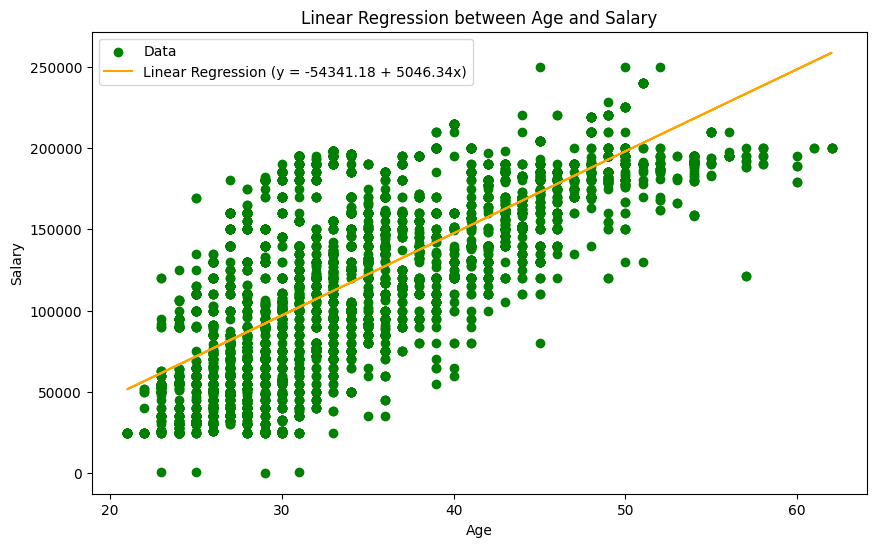

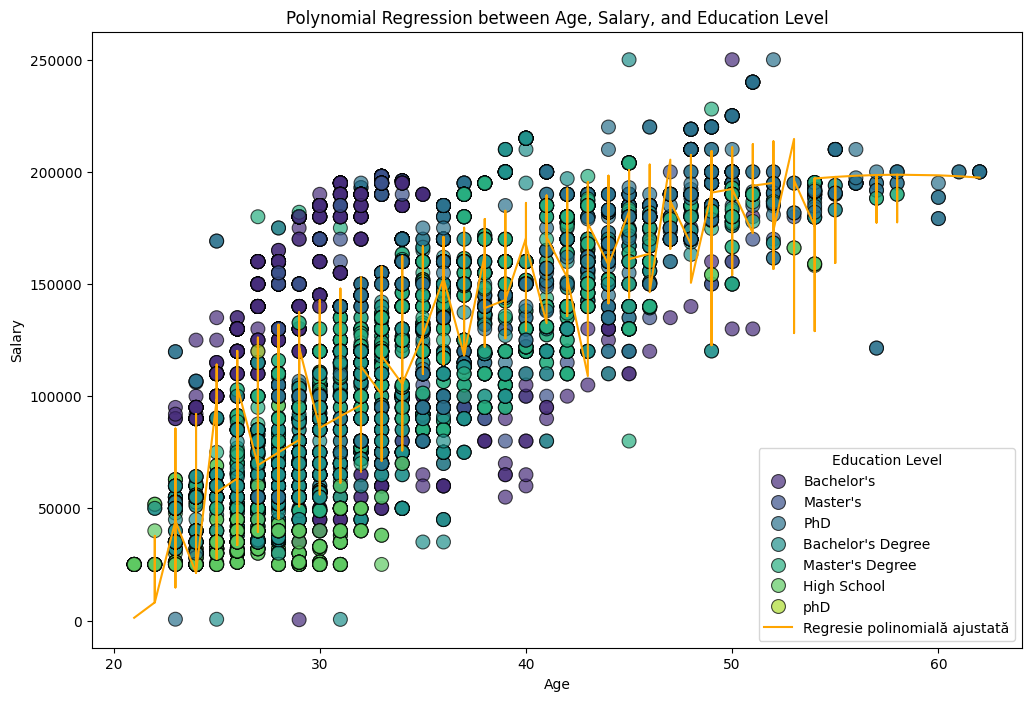

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns

# Load data
df = pd.read_csv('date.csv')
print(df.head())

# Clean data for Age and Salary
df_cleaned = df.dropna(subset=['Age', 'Salary'])

# Prepare features and target variable
x = df_cleaned[['Age']]
y = df_cleaned['Salary']

# Linear regression
model = LinearRegression()
model.fit(x, y)

# Intercept and coefficient
a = model.intercept_
b = model.coef_[0]
r_squared = model.score(x, y)

print(f"Intercept (a): {a}")
print(f"Slope (b): {b}")
print(f"R^2: {r_squared}")

y_pred = model.predict(x)

# Linear regression plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', label='Data')
plt.plot(x, y_pred, color='orange', label=f'Linear Regression (y = {a:.2f} + {b:.2f}x)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Linear Regression between Age and Salary')
plt.legend()
plt.show()

# Clean for Age, Salary, and Education Level
df_cleaned = df.dropna(subset=['Age', 'Salary', 'Education Level'])

# Prepare features and target variable for polynomial regression
x = df_cleaned[['Age', 'Education Level']]
y = df_cleaned['Salary']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('poly_age', PolynomialFeatures(degree=2), ['Age']),
    ('education_level', OneHotEncoder(), ['Education Level'])
])

# Create and fit the model
model = make_pipeline(preprocessor, LinearRegression())
model.fit(x, y)
y_pred = model.predict(x)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='Age', y='Salary', hue='Education Level', palette='viridis', s=100, edgecolor='k', alpha=0.7)

# Sorting values for plotting the regression line
sorted_indices = np.argsort(x['Age'].values.flatten())
sorted_x = x.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(sorted_x['Age'], y_pred_sorted, color='orange', label='Regresie polinomială ajustată')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Polynomial Regression between Age, Salary, and Education Level')
plt.legend(title='Education Level')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving date.csv to date.csv
